# Analysis Of DC vs RCB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
Matches=pd.read_csv("matches.csv")

In [3]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?#  

In [4]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [5]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [6]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [8]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

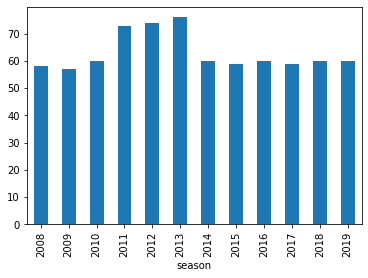

In [9]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [10]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [11]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.#  

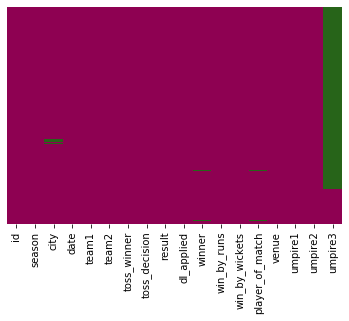

In [12]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Removed the columns containing more missing values and have less impact on the predicting matches


In [13]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [14]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

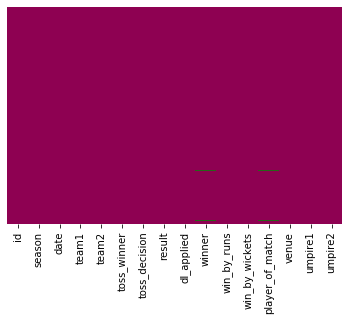

In [15]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Today's match is between Delhi capitals(DC) and Royal Challengers  Bangalore(RCB).so we only want information between the matches that had take place between them.

#  Delhi Dardevils Changed  to Delhi capitals in 2019 So need to change the title to Delhi Capitals

In [16]:
Matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [17]:
Matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [18]:
RCB_DC1=Matches.loc[(Matches['team1']=='Delhi Capitals')&(Matches['team2'] =='Royal Challengers Bangalore')]
RCB_DC1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
75,76,2008,Delhi,2008-04-30,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Capitals,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
166,167,2009,Johannesburg,2009-05-19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Royal Challengers Bangalore,0,7,JH Kallis,New Wanderers Stadium,IL Howell,RB Tiffin,NaN
196,197,2010,Bangalore,2010-03-25,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Capitals,17,0,KM Jadhav,M Chinnaswamy Stadium,BG Jerling,RE Koertzen,NaN
208,209,2010,Delhi,2010-04-04,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,37,0,PD Collingwood,Feroz Shah Kotla,BF Bowden,M Erasmus,NaN
262,263,2011,Delhi,2011-04-26,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,3,V Kohli,Feroz Shah Kotla,S Asnani,RJ Tucker,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
458,459,2014,Sharjah,2014-04-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,YS Chahal,Sharjah Cricket Stadium,Aleem Dar,S Ravi,NaN
542,543,2015,Delhi,2015-04-26,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
631,632,2016,Raipur,2016-05-22,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN


In [20]:
RCB_DC2=Matches.loc[(Matches['team2']=='Delhi Capitals')&(Matches['team1'] =='Royal Challengers Bangalore')]

In [21]:
RCB_DC2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN
103,104,2008,Bangalore,2008-05-19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,SP Goswami,M Chinnaswamy Stadium,SJ Davis,GA Pratapkumar,NaN
128,129,2009,Port Elizabeth,2009-04-26,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Delhi Capitals,0,6,TM Dilshan,St George's Park,S Asnani,BG Jerling,NaN
311,312,2012,Bangalore,2012-04-07,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Royal Challengers Bangalore,20,0,AB de Villiers,M Chinnaswamy Stadium,S Asnani,S Ravi,NaN
371,372,2012,Delhi,2012-05-17,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Feroz Shah Kotla,HDPK Dharmasena,C Shamshuddin,NaN
437,438,2013,Delhi,2013-05-10,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Royal Challengers Bangalore,4,0,JD Unadkat,Feroz Shah Kotla,NJ Llong,K Srinath,NaN
494,495,2014,Bangalore,2014-05-13,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Royal Challengers Bangalore,16,0,Yuvraj Singh,M Chinnaswamy Stadium,K Srinath,RJ Tucker,NaN
586,587,2016,Bangalore,2016-04-17,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,Q de Kock,M Chinnaswamy Stadium,VA Kulkarni,A Nand Kishore,NaN
715,11311,2019,Bengaluru,07/04/19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,K Rabada,M. Chinnaswamy Stadium,S Ravi,Yeshwant Barde,O Nandan


In [22]:
RCB_DC=RCB_DC1.append(RCB_DC2)

In [23]:
RCB_DC

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
75,76,2008,Delhi,2008-04-30,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Capitals,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
166,167,2009,Johannesburg,2009-05-19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Royal Challengers Bangalore,0,7,JH Kallis,New Wanderers Stadium,IL Howell,RB Tiffin,NaN
196,197,2010,Bangalore,2010-03-25,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Capitals,17,0,KM Jadhav,M Chinnaswamy Stadium,BG Jerling,RE Koertzen,NaN
208,209,2010,Delhi,2010-04-04,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,37,0,PD Collingwood,Feroz Shah Kotla,BF Bowden,M Erasmus,NaN
262,263,2011,Delhi,2011-04-26,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,3,V Kohli,Feroz Shah Kotla,S Asnani,RJ Tucker,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
458,459,2014,Sharjah,2014-04-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,YS Chahal,Sharjah Cricket Stadium,Aleem Dar,S Ravi,NaN
542,543,2015,Delhi,2015-04-26,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
631,632,2016,Raipur,2016-05-22,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN


In [24]:
RCB_DC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 75 to 715
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               23 non-null     int64 
 1   season           23 non-null     int64 
 2   city             23 non-null     object
 3   date             23 non-null     object
 4   team1            23 non-null     object
 5   team2            23 non-null     object
 6   toss_winner      23 non-null     object
 7   toss_decision    23 non-null     object
 8   result           23 non-null     object
 9   dl_applied       23 non-null     int64 
 10  winner           22 non-null     object
 11  win_by_runs      23 non-null     int64 
 12  win_by_wickets   23 non-null     int64 
 13  player_of_match  22 non-null     object
 14  venue            23 non-null     object
 15  umpire1          22 non-null     object
 16  umpire2          22 non-null     object
 17  umpire3          4 non-null      ob

# # Complete details of matches that takes placed between RCB and DC

In [25]:
RCB_DC.describe

<bound method NDFrame.describe of         id  season            city        date                        team1  \
75      76    2008           Delhi  2008-04-30               Delhi Capitals   
166    167    2009    Johannesburg  2009-05-19               Delhi Capitals   
196    197    2010       Bangalore  2010-03-25               Delhi Capitals   
208    209    2010           Delhi  2010-04-04               Delhi Capitals   
262    263    2011           Delhi  2011-04-26               Delhi Capitals   
400    401    2013       Bangalore  2013-04-16               Delhi Capitals   
458    459    2014         Sharjah  2014-04-17               Delhi Capitals   
542    543    2015           Delhi  2015-04-26               Delhi Capitals   
570    571    2015       Bangalore  2015-05-17               Delhi Capitals   
631    632    2016          Raipur  2016-05-22               Delhi Capitals   
654   7912    2018       Bengaluru    21/04/18               Delhi Capitals   
680   7938    2018

In [26]:
print("No of matches that takes place between KXIP and DC:",len(RCB_DC))

No of matches that takes place between KXIP and DC: 23


#  Below plot gives the details of the match that takes place between DC and RCB

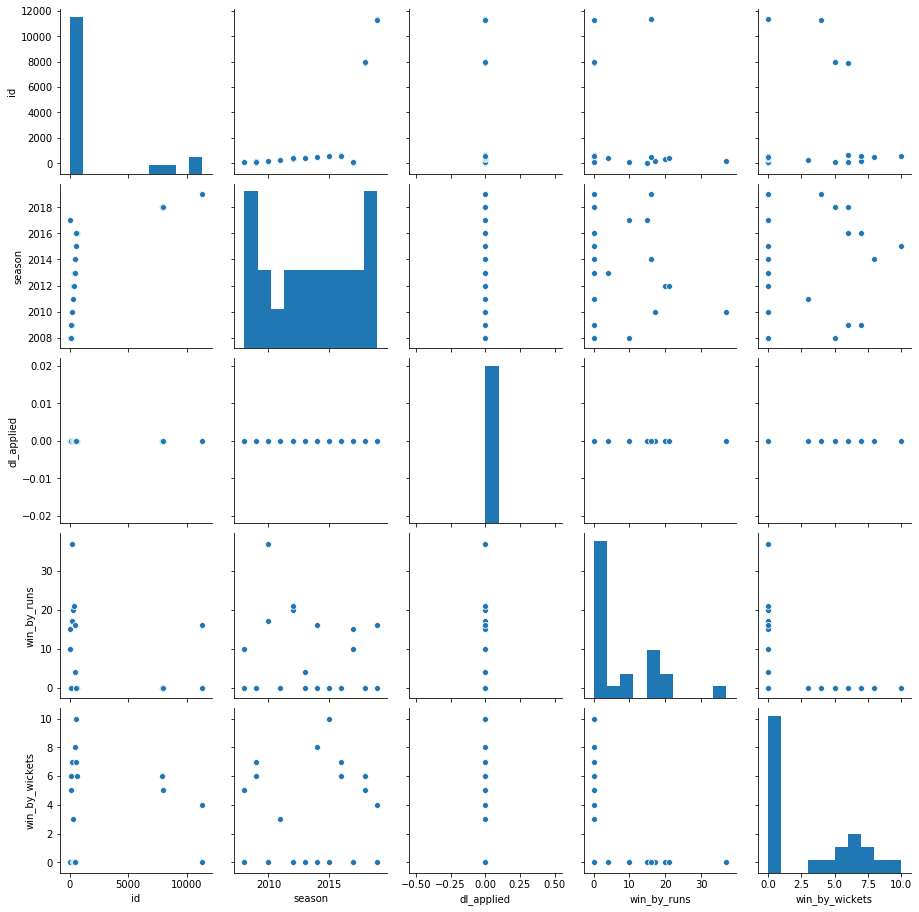

In [27]:
sns.pairplot(RCB_DC)

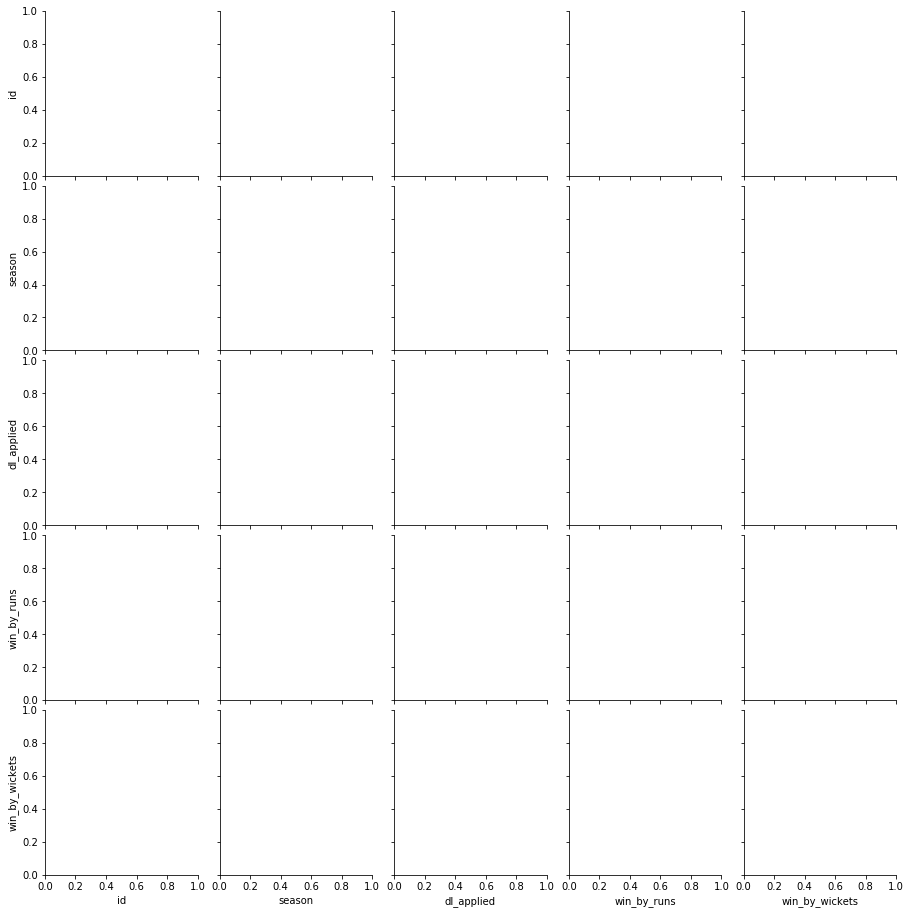

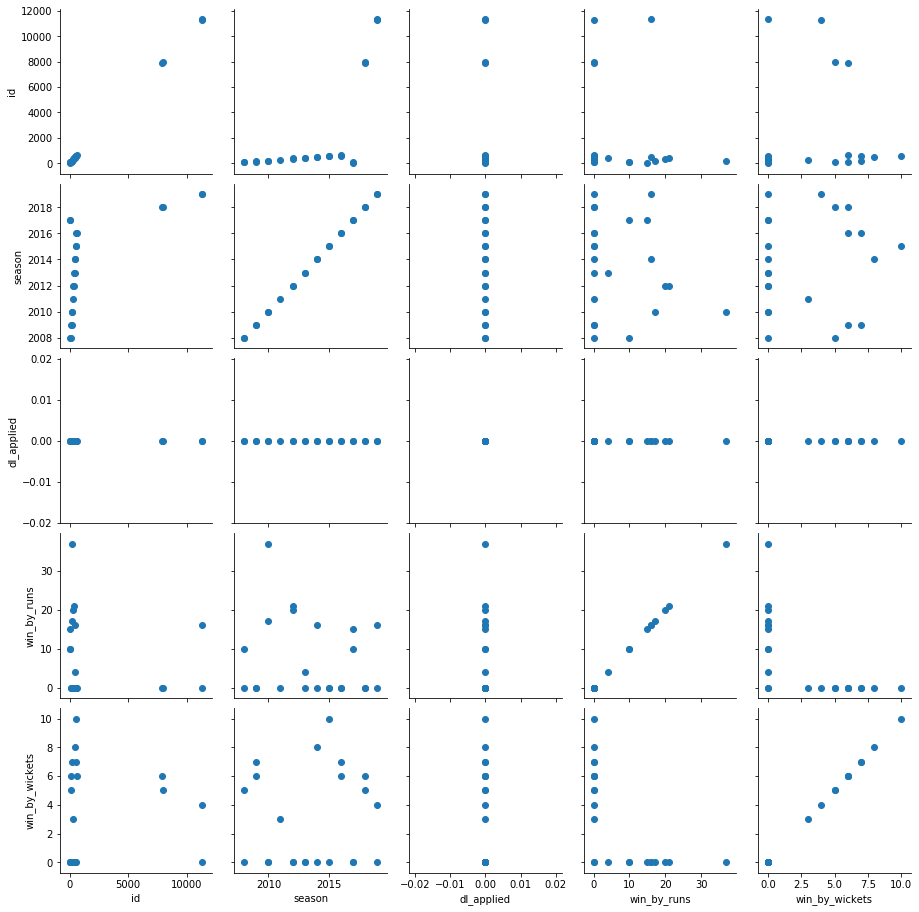

In [28]:
sns.PairGrid(RCB_DC)
g=sns.PairGrid(RCB_DC)
g.map(plt.scatter)

#  It looks like  DC win the Toss 10 Times and 13 Times RCB win the Toss

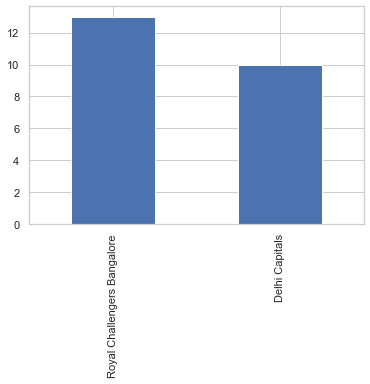

In [31]:
sns.set()
sns.set_style('whitegrid')
RCB_DC['toss_winner'].value_counts().plot(kind='bar')

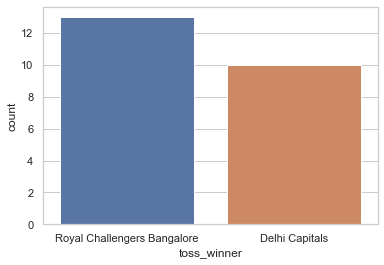

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='toss_winner',data=RCB_DC)

# DC went on to win the match 3 times by  batting first and 5 times by Batting second against RCB .so total it is (DC=win-8,loss-14)whereas for RCB they win the match 3 times by batting first and win 11 times by batting second against DC(RCB=win-14,loss=8)

In [35]:
RCB_DC.tail(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
586,587,2016,Bangalore,2016-04-17,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,Q de Kock,M Chinnaswamy Stadium,VA Kulkarni,A Nand Kishore,NaN
715,11311,2019,Bengaluru,07/04/19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,K Rabada,M. Chinnaswamy Stadium,S Ravi,Yeshwant Barde,O Nandan


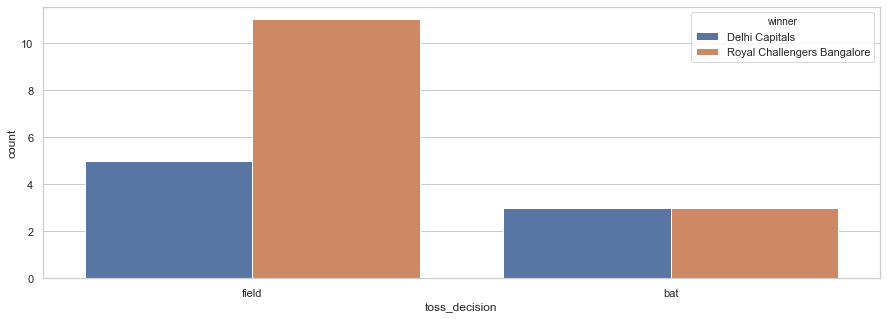

In [36]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.set_style('whitegrid')
sns.countplot(x='toss_decision',hue="winner",data=RCB_DC)

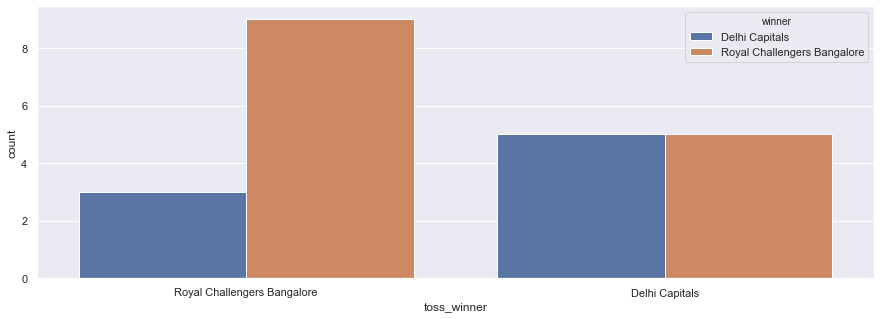

In [37]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=RCB_DC)

In [38]:
print("No of times toss win by both teams:")
RCB_DC['toss_winner'].value_counts()

No of times toss win by both teams:


Royal Challengers Bangalore    13
Delhi Capitals                 10
Name: toss_winner, dtype: int64

In [39]:
print("RCB win 14 times and Delhi win 8 times from 24 matches")

RCB win 14 times and Delhi win 8 times from 24 matches


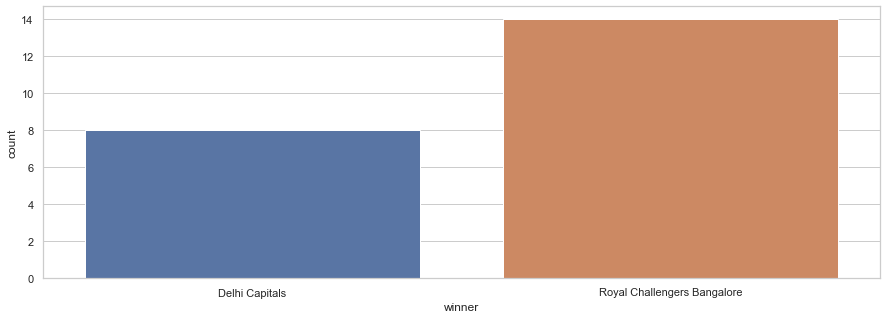

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='winner',data=RCB_DC)

# correlation between Columns in Matches Dataset

In [41]:
RCB_DC.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.659873,NaN,-0.126396,0.084190
season,0.659873,1.000000,NaN,-0.178969,0.084081
dl_applied,NaN,NaN,NaN,NaN,NaN
win_by_runs,-0.126396,-0.178969,NaN,1.000000,-0.644418
win_by_wickets,0.084190,0.084081,NaN,-0.644418,1.000000


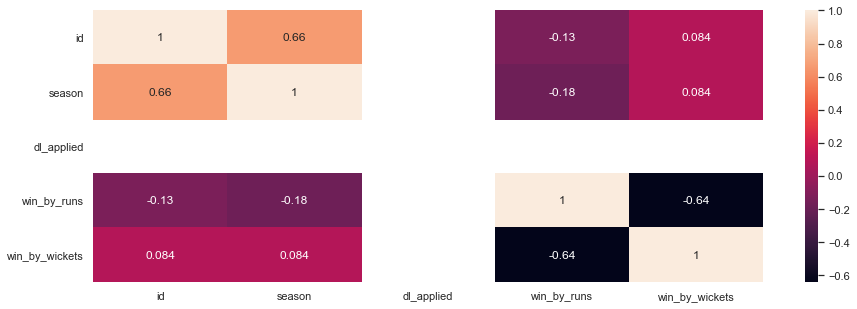

In [42]:
sns.heatmap(RCB_DC.corr(),yticklabels=True,annot=True)

In [44]:
RCB_DC['winner']=pd.get_dummies(RCB_DC['winner'])

In [45]:
RCB_DC.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
75,76,2008,Delhi,2008-04-30,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,1,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
166,167,2009,Johannesburg,2009-05-19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,0,0,7,JH Kallis,New Wanderers Stadium,IL Howell,RB Tiffin,NaN


# Using Sweetviz we can get details about the Matches

In [46]:
import sweetviz 
my_report=sweetviz.analyze([RCB_DC,'RCB_DC'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [47]:
my_report.show_html("Report1.html")

#  Now let get into the Deliveries Dataset

In [48]:
Deliveries=pd.read_csv("deliveries.csv")

In [49]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [50]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [51]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Need To replace Delhi Dardevils with Delhi Capitals

In [52]:
Deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [53]:
Deliveries.tail(30)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179048,11415,2,Chennai Super Kings,Mumbai Indians,16,1,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179049,11415,2,Chennai Super Kings,Mumbai Indians,16,2,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179050,11415,2,Chennai Super Kings,Mumbai Indians,16,3,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179051,11415,2,Chennai Super Kings,Mumbai Indians,16,4,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179052,11415,2,Chennai Super Kings,Mumbai Indians,16,5,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179053,11415,2,Chennai Super Kings,Mumbai Indians,16,6,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179054,11415,2,Chennai Super Kings,Mumbai Indians,17,1,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179055,11415,2,Chennai Super Kings,Mumbai Indians,17,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179056,11415,2,Chennai Super Kings,Mumbai Indians,17,3,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179057,11415,2,Chennai Super Kings,Mumbai Indians,17,4,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Filtering the match details that only takes place between Delhi Capitals and  Sunrises Hyderabad

In [54]:
Delhi_Bangalore1=Deliveries.loc[(Deliveries['batting_team' ] =='Royal Challengers Bangalore' ) & (Deliveries['bowling_team'] == 'Delhi Capitals')]

In [55]:
Delhi_Bangalore1         

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
960,5,1,Royal Challengers Bangalore,Delhi Capitals,1,1,CH Gayle,SR Watson,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
961,5,1,Royal Challengers Bangalore,Delhi Capitals,1,2,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
962,5,1,Royal Challengers Bangalore,Delhi Capitals,1,3,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
963,5,1,Royal Challengers Bangalore,Delhi Capitals,1,4,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
964,5,1,Royal Challengers Bangalore,Delhi Capitals,1,5,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175903,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,3,Washington Sundar,MP Stoinis,K Rabada,0,...,0,0,0,0,0,0,0,Washington Sundar,caught,SS Iyer
175904,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,4,MP Stoinis,UT Yadav,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175905,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,5,MP Stoinis,UT Yadav,K Rabada,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
175906,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,6,MP Stoinis,UT Yadav,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [56]:
Delhi_Bangalore2=Deliveries.loc[(Deliveries['bowling_team' ] =='Royal Challengers Bangalore') & (Deliveries['batting_team'] == 'Delhi Capitals')]

In [57]:
Delhi_Bangalore2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1084,5,2,Delhi Capitals,Royal Challengers Bangalore,1,1,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1085,5,2,Delhi Capitals,Royal Challengers Bangalore,1,2,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1086,5,2,Delhi Capitals,Royal Challengers Bangalore,1,3,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1087,5,2,Delhi Capitals,Royal Challengers Bangalore,1,4,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1088,5,2,Delhi Capitals,Royal Challengers Bangalore,1,5,SW Billings,AP Tare,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175781,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,2,S Rutherford,AR Patel,N Saini,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175782,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,3,S Rutherford,AR Patel,N Saini,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175783,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,4,AR Patel,S Rutherford,N Saini,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175784,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,5,AR Patel,S Rutherford,N Saini,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [58]:
Delhi_Bangalore=Delhi_Bangalore1.append(Delhi_Bangalore2)

# Complete Details Of Delhi vs Bangalore

In [59]:
Delhi_Bangalore

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
960,5,1,Royal Challengers Bangalore,Delhi Capitals,1,1,CH Gayle,SR Watson,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
961,5,1,Royal Challengers Bangalore,Delhi Capitals,1,2,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
962,5,1,Royal Challengers Bangalore,Delhi Capitals,1,3,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
963,5,1,Royal Challengers Bangalore,Delhi Capitals,1,4,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
964,5,1,Royal Challengers Bangalore,Delhi Capitals,1,5,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175781,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,2,S Rutherford,AR Patel,N Saini,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175782,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,3,S Rutherford,AR Patel,N Saini,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175783,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,4,AR Patel,S Rutherford,N Saini,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175784,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,5,AR Patel,S Rutherford,N Saini,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# using Match_id we can summarize that 24 matches were played between RCB and DC

In [60]:
Delhi_Bangalore['match_id'].value_counts()

401      258
197      252
263      251
495      249
55       249
438      249
372      248
5        248
129      246
7938     245
11311    245
312      244
209      244
11337    243
76       243
587      243
167      239
632      236
104      236
7912     234
459      230
543      181
571      130
Name: match_id, dtype: int64

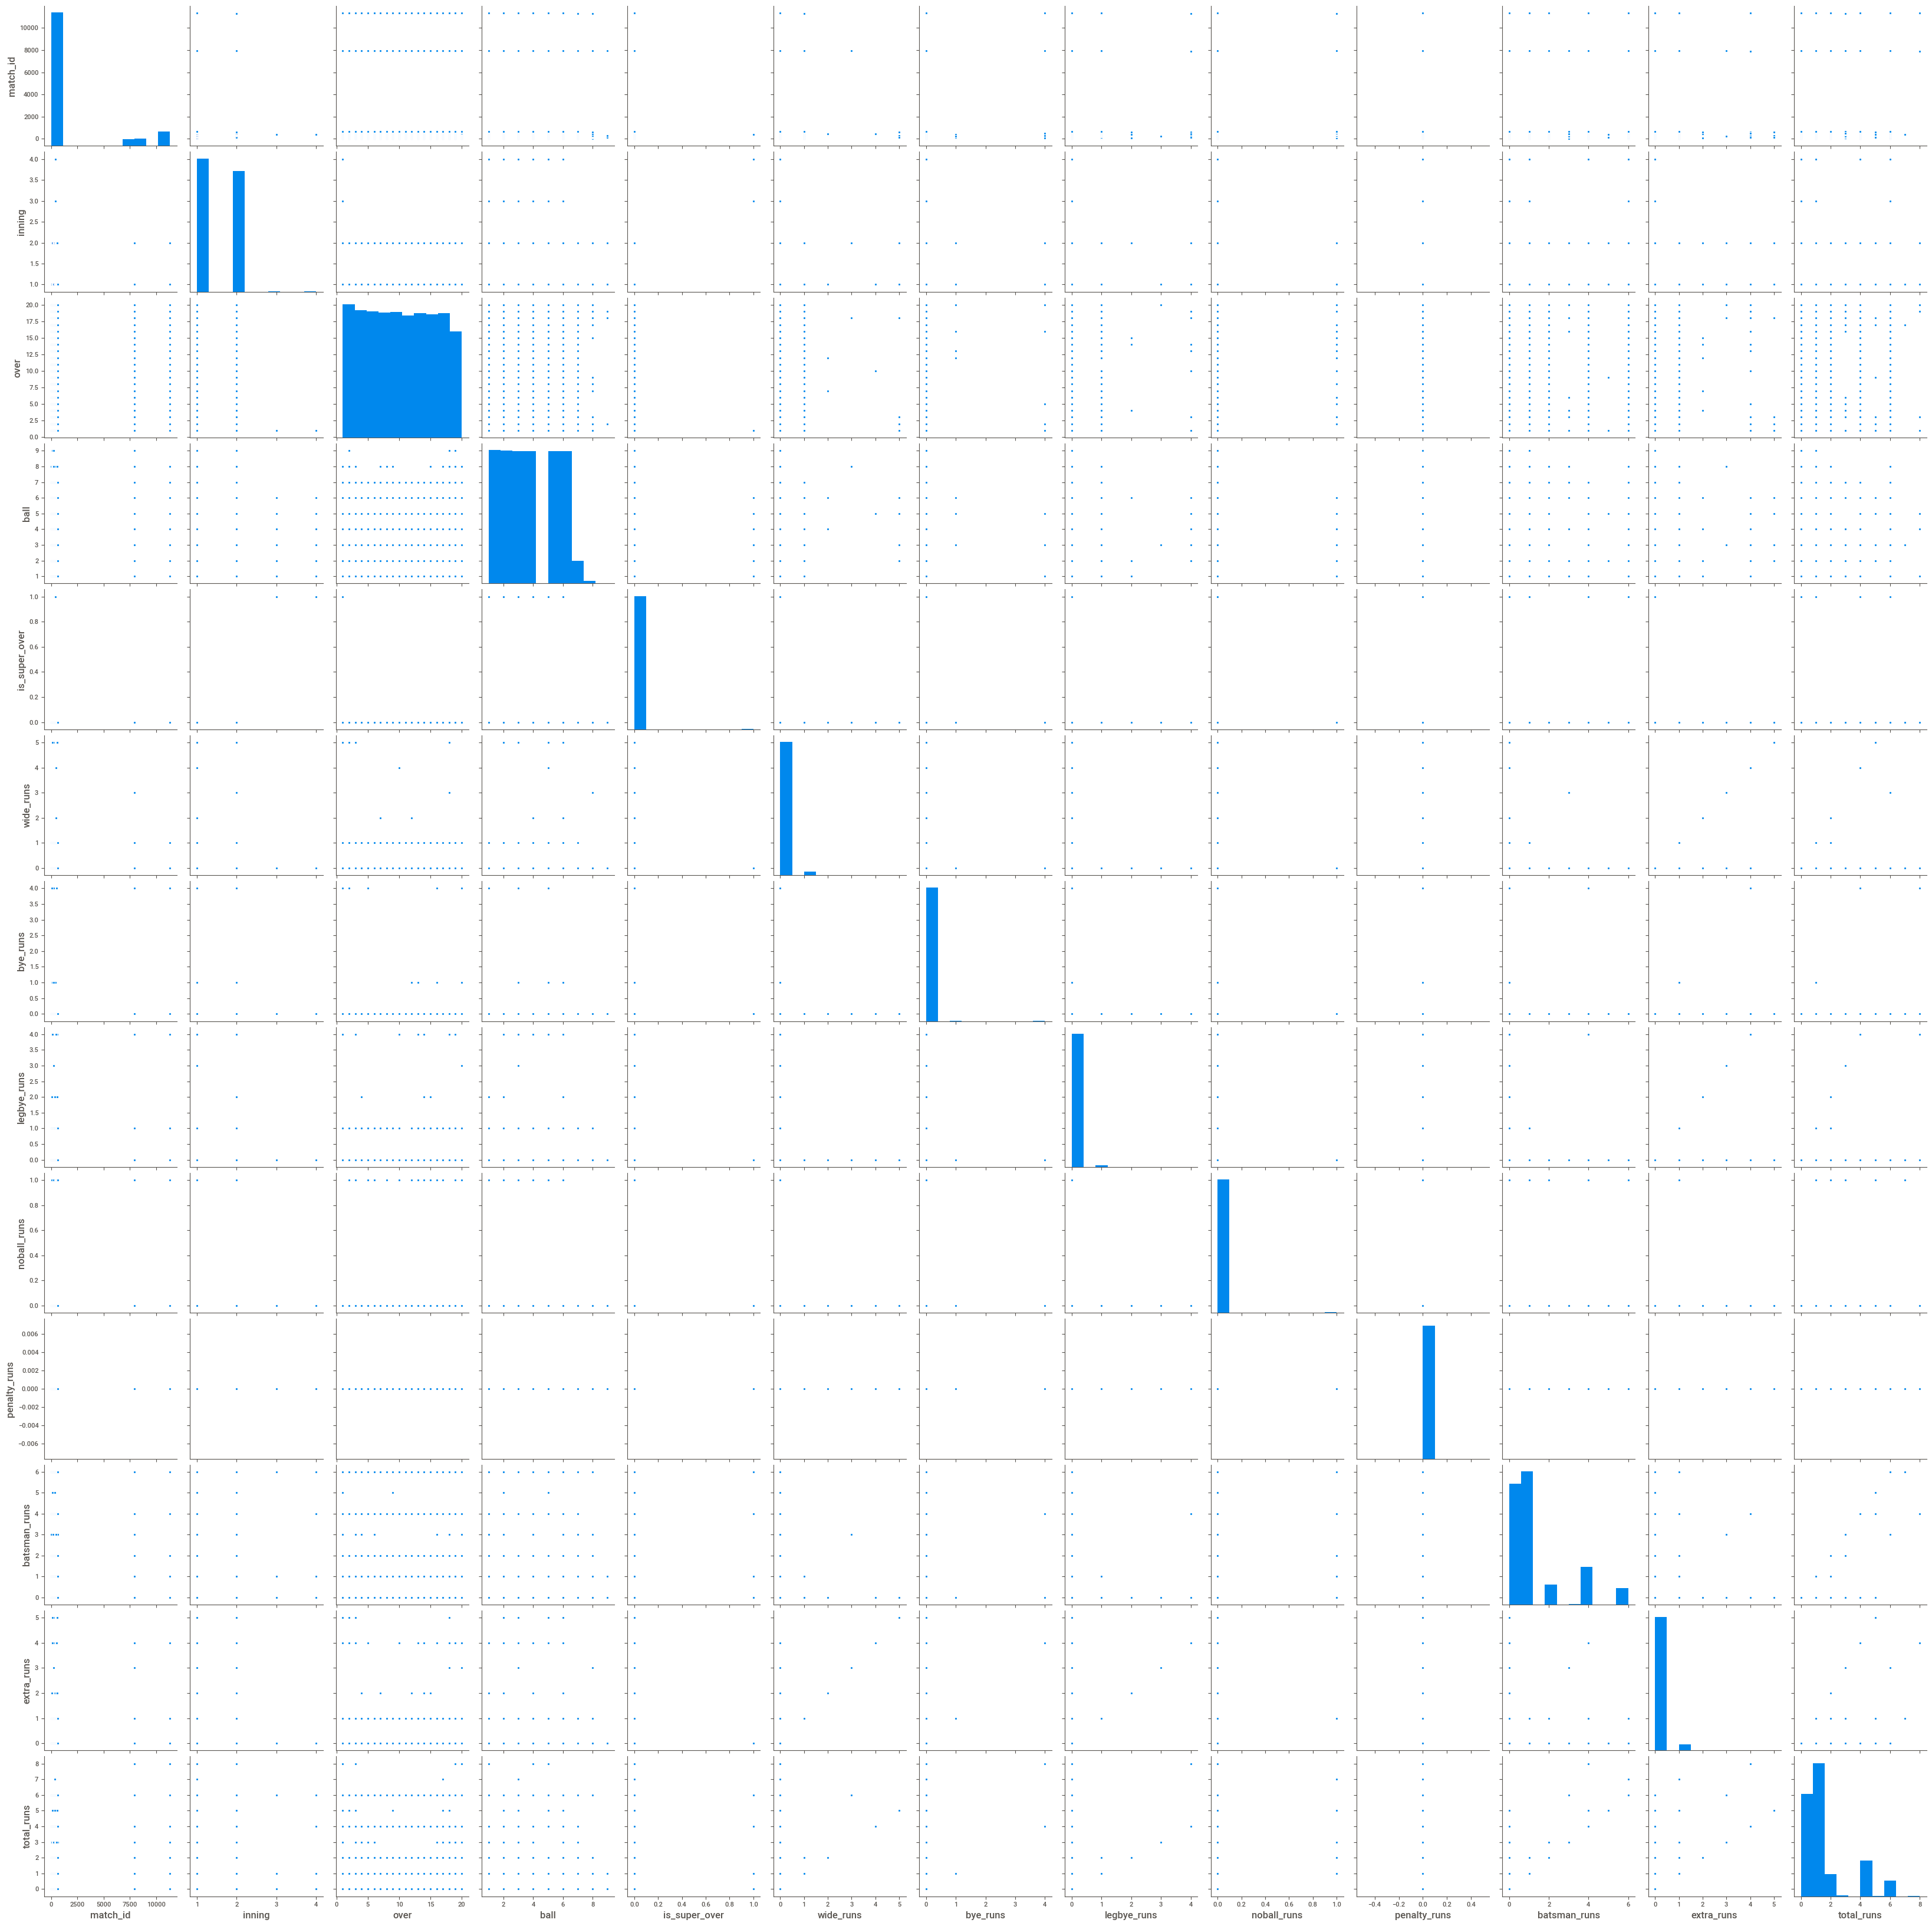

In [61]:
sns.pairplot(Delhi_Bangalore)

# It's difficult to interpret covariance.Let's try correlation

In [62]:
Delhi_Bangalore.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.327490e+07,13.050884,1.611613,4.925082,-3.447554,-5.513954,5.934098,-0.053106,-2.982917,0.0,199.154009,-2.615879,196.538130
inning,1.305088e+01,0.258447,-0.146385,-0.009193,0.004455,-0.000256,0.001472,0.000988,-0.000078,0.0,0.005104,0.002126,0.007230
over,1.611613e+00,-0.146385,32.832084,0.020001,-0.020427,-0.015319,0.000076,0.014046,0.010772,0.0,0.751464,0.009575,0.761039
ball,4.925082e+00,-0.009193,0.020001,3.238401,-0.000242,0.004541,-0.000963,0.000420,-0.001299,0.0,0.069948,0.002700,0.072647
is_super_over,-3.447554e+00,0.004455,-0.020427,-0.000242,0.002200,-0.000071,-0.000010,-0.000047,-0.000011,0.0,0.001924,-0.000140,0.001785
wide_runs,-5.513954e+00,-0.000256,-0.015319,0.004541,-0.000071,0.057389,-0.000149,-0.000689,-0.000166,0.0,-0.035416,0.056384,0.020968
bye_runs,5.934098e+00,0.001472,0.000076,-0.000963,-0.000010,-0.000149,0.015598,-0.000098,-0.000024,0.0,-0.000064,0.015328,0.015264
legbye_runs,-5.310622e-02,0.000988,0.014046,0.000420,-0.000047,-0.000689,-0.000098,0.042912,-0.000110,0.0,-0.019313,0.042015,0.022703
noball_runs,-2.982917e+00,-0.000078,0.010772,-0.001299,-0.000011,-0.000166,-0.000024,-0.000110,0.005119,0.0,-0.000777,0.004819,0.004042
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [63]:
Delhi_Bangalore.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.007046,0.000077,0.000751,-0.020173,-0.006317,0.013041,-0.000070,-0.011443,NaN,0.033657,-0.002085,0.033168
inning,0.007046,1.000000,-0.050253,-0.010049,0.186836,-0.002104,0.023188,0.009381,-0.002154,NaN,0.006182,0.012144,0.008744
over,0.000077,-0.050253,1.000000,0.001940,-0.076000,-0.011160,0.000106,0.011834,0.026277,NaN,0.080753,0.004853,0.081667
ball,0.000751,-0.010049,0.001940,1.000000,-0.002863,0.010534,-0.004284,0.001128,-0.010088,NaN,0.023933,0.004357,0.024822
is_super_over,-0.020173,0.186836,-0.076000,-0.002863,1.000000,-0.006345,-0.001729,-0.004836,-0.003380,NaN,0.025261,-0.008654,0.023394
wide_runs,-0.006317,-0.002104,-0.011160,0.010534,-0.006345,1.000000,-0.004965,-0.013889,-0.009707,NaN,-0.091031,0.683599,0.053819
bye_runs,0.013041,0.023188,0.000106,-0.004284,-0.001729,-0.004965,1.000000,-0.003784,-0.002645,NaN,-0.000316,0.356456,0.075148
legbye_runs,-0.000070,0.009381,0.011834,0.001128,-0.004836,-0.013889,-0.003784,1.000000,-0.007399,NaN,-0.057405,0.589078,0.067387
noball_runs,-0.011443,-0.002154,0.026277,-0.010088,-0.003380,-0.009707,-0.002645,-0.007399,1.000000,NaN,-0.006691,0.195630,0.034735
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

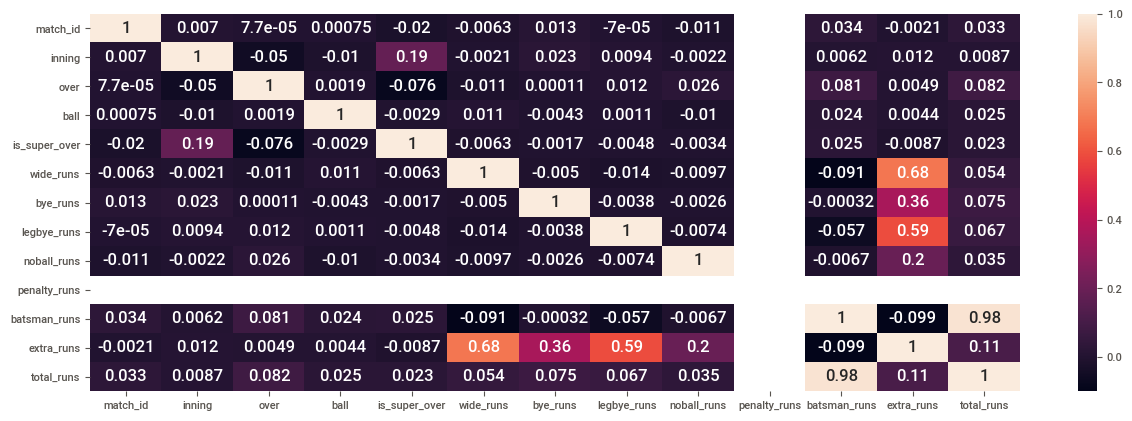

In [64]:
sns.heatmap(Delhi_Bangalore.corr(),yticklabels=True,annot=True)

In [65]:
Delhi_Bangalore.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.0,5443.000000,5443.000000,5443.000000
mean,1964.465552,1.479515,10.263458,3.609590,0.002205,0.032335,0.004593,0.021312,0.005144,0.0,1.293956,0.063384,1.357340
std,3643.474159,0.508376,5.729929,1.799556,0.046906,0.239559,0.124893,0.207152,0.071545,0.0,1.624061,0.344306,1.626339
min,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,167.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,401.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,587.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,11337.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,4.000000,1.000000,0.0,6.000000,5.000000,8.000000


In [66]:
Delhi_Bangalore

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
960,5,1,Royal Challengers Bangalore,Delhi Capitals,1,1,CH Gayle,SR Watson,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
961,5,1,Royal Challengers Bangalore,Delhi Capitals,1,2,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
962,5,1,Royal Challengers Bangalore,Delhi Capitals,1,3,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
963,5,1,Royal Challengers Bangalore,Delhi Capitals,1,4,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
964,5,1,Royal Challengers Bangalore,Delhi Capitals,1,5,SR Watson,CH Gayle,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175781,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,2,S Rutherford,AR Patel,N Saini,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175782,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,3,S Rutherford,AR Patel,N Saini,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175783,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,4,AR Patel,S Rutherford,N Saini,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175784,11337,1,Delhi Capitals,Royal Challengers Bangalore,20,5,AR Patel,S Rutherford,N Saini,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# How many balls will Rabada take to get his First Wicket?

In [67]:
Rabada_wicket=Deliveries.loc[(Deliveries['bowler']=='K Rabada')]

In [70]:
Rabada_wicket.tail(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
175906,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,6,MP Stoinis,UT Yadav,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175907,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,7,MP Stoinis,UT Yadav,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [71]:
Rabada_Wicket=Rabada_wicket.loc[(Rabada_wicket['noball_runs']==0)&(Rabada_wicket['wide_runs']==0)]

In [72]:
Rabada_Wicket.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Capitals,1,1,PA Patel,JC Buttler,K Rabada,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Capitals,1,3,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [73]:
Rabada_Wicket.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
24,24,210,96,0,0,0,1,0,0,23,1,24
31,40,172,66,0,0,4,4,0,0,19,8,27
35,24,36,45,0,0,0,0,0,0,17,0,17
39,24,270,90,0,0,0,0,0,0,54,0,54
41,24,258,84,0,0,0,0,0,0,28,0,28
44,24,246,93,0,0,0,1,0,0,29,1,30
11139,48,288,101,0,0,0,1,0,0,20,1,21
11141,44,236,73,0,0,0,0,0,0,26,0,26
11146,49,275,107,0,0,0,0,0,0,47,0,47


In [74]:
Rabada_Wicket['dismissal_kind'].value_counts()

caught     25
bowled      6
run out     5
Name: dismissal_kind, dtype: int64

In [78]:
len(Rabada_Wicket['match_id'].value_counts())

18

In [76]:
match_id=Rabada_Wicket['match_id']
dismissal_kind=Rabada_Wicket['dismissal_kind']
for ide,wicket in zip(match_id,dismissal_kind):
    print(ide,wicket)

24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 bowled
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 nan
24 run out
31 nan
31 bowled
31 nan
31 nan
31 nan
31 nan
31 nan
31 nan
31 nan
31 nan
31 nan
31 nan
31 nan
31 nan
31 nan
31 nan
31 bowled
31 nan
31 nan
31 nan
35 nan
35 nan
35 nan
35 nan
35 nan
35 nan
35 nan
35 nan
35 nan
35 nan
35 nan
35 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
39 nan
41 caught
41 run out
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 nan
41 caught
41 nan
41 nan
41 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 caught
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
44 nan
11139 nan
11139 nan
11139 nan
11139 nan
11139 nan
11139 nan
11139 nan
11139 na

In [77]:
print("In match_id 24 Rabada took 12 balls to get his first wicket")
print("In match_id 31 Rabada took 2 balls to get his first wicket")
print("In match_id 35 Rabada didn't get wicket from his 12 balls")
print("In match_id 39 Rabada didn't get wicket from his 24 balls")
print('In match_id 41 Rabada took 1 ball to get his first wicket')
print('In match_id 44 Rabada took 15 balls to get his first wicket')
print('In match_id 11139 Rabada took 14 balls to get his first wicket')
print('In match_id 11141 Rabada took 19 balls to get his first wicket')
print('In match_id 11146 Rabada took 11 balls to get his first wicket')
print('In match_id 11149 Rabada took 15 balls to get his first wicket')
print('In match_id 11152 Rabada took 12 balls to get his first wicket')
print('In match_id 11311 Rabada took 6 balls to get his first wicket')
print('In match_id 11317 Rabada took 10 balls to get his first wicket')
print('In match_id 11321 Rabada took 14 balls to get his first wicket')
print('In match_id 11325 Rabada took 13 balls to get his first wicket')
print('In match_id 11328 Rabada took 5 balls to get his first wicket')
print('In match_id 11331 Rabada took 20 balls to get his first wicket')
print('In match_id 11337 Rabada took 11 balls to get his first wicket')

In match_id 24 Rabada took 12 balls to get his first wicket
In match_id 31 Rabada took 2 balls to get his first wicket
In match_id 35 Rabada didn't get wicket from his 12 balls
In match_id 39 Rabada didn't get wicket from his 24 balls
In match_id 41 Rabada took 1 ball to get his first wicket
In match_id 44 Rabada took 15 balls to get his first wicket
In match_id 11139 Rabada took 14 balls to get his first wicket
In match_id 11141 Rabada took 19 balls to get his first wicket
In match_id 11146 Rabada took 11 balls to get his first wicket
In match_id 11149 Rabada took 15 balls to get his first wicket
In match_id 11152 Rabada took 12 balls to get his first wicket
In match_id 11311 Rabada took 6 balls to get his first wicket
In match_id 11317 Rabada took 10 balls to get his first wicket
In match_id 11321 Rabada took 14 balls to get his first wicket
In match_id 11325 Rabada took 13 balls to get his first wicket
In match_id 11328 Rabada took 5 balls to get his first wicket
In match_id 11331 R

In [82]:
print("Average balls taken by Rabada to get his First Wicket",(12+2+1+15+14+19+11+15+12+6+10+14+13+5+20+11)/16)

Average balls taken by Rabada to get his First Wicket 11.25


# How many bowlers ll have an economy less than 8 and give away less than 4 boundaries? 

# Rabada Economy and Boundaries

In [83]:
Rabada_wicket['total_runs'].value_counts()

0    156
1    152
4     64
2     44
6     15
5      2
3      1
Name: total_runs, dtype: int64

In [88]:
Rabada_wicket['ball'].value_counts()

2    71
1    71
3    70
4    69
6    68
5    68
7    15
8     2
Name: ball, dtype: int64

In [85]:
Rabada_wicket['total_runs'].sum()

599

In [84]:
len(Rabada_wicket['match_id'].value_counts())

18

In [89]:
print("Average economy of Rabada in a single match",599//72)

Average economy of Rabada in a single match 8


In [90]:
print("Average boundaries given by Rabada in a single match",79//18)

Average boundaries given by Rabada in a single match 4


# Axar Patel Economy and Boundary

In [91]:
Axar_economy=Deliveries.loc[(Deliveries['bowler']=='AR Patel')]

In [93]:
Axar_economy['total_runs'].value_counts()

1    835
0    560
4    140
2    116
6     89
3      3
8      1
5      1
Name: total_runs, dtype: int64

In [97]:
len(Axar_economy['match_id'].value_counts())

81

In [95]:
Axar_economy['total_runs'].sum()

2183

In [94]:
Axar_economy['ball'].value_counts()

5    286
4    286
3    286
2    286
1    286
6    284
7     27
8      3
9      1
Name: ball, dtype: int64

In [96]:
print("Average economy of Axar patel in a single match",2183//290)

Average economy of Axar patel in a single match 7


In [98]:
print("Average boundaries given by Axar Patel in a single match",229//81)

Average boundaries given by Axar Patel in a single match 2


# washington sundar economy

In [99]:
washington_sundar_economy=Deliveries.loc[(Deliveries['bowler']=='Washington Sundar')]

In [100]:
washington_sundar_economy['total_runs'].value_counts()

1     157
0     128
4      30
6      24
2      18
10      1
Name: total_runs, dtype: int64

In [101]:
len(washington_sundar_economy['match_id'].value_counts())

20

In [102]:
washington_sundar_economy['total_runs'].sum()

467

In [103]:
washington_sundar_economy['ball'].value_counts()

6    59
5    59
4    59
3    59
2    59
1    59
7     3
8     1
Name: ball, dtype: int64

In [105]:
print("Average economy of Washington Sundar in a single match",467//59)

Average economy of Washington Sundar in a single match 7


In [106]:
print("Average boundaries given by washington sundar in a single match",54//20)

Average boundaries given by washington sundar in a single match 2


# chahal economy

In [107]:
Chahal_economy=Deliveries.loc[(Deliveries['bowler']=='YS Chahal')]

In [108]:
Chahal_economy['total_runs'].value_counts()

1     777
0     639
2     154
4     140
6     119
3       7
8       2
5       2
10      1
Name: total_runs, dtype: int64

In [109]:
len(Chahal_economy['match_id'].value_counts())

83

In [110]:
Chahal_economy['total_runs'].sum()

2416

In [111]:
Chahal_economy['ball'].value_counts()

1    301
2    299
3    298
5    297
4    297
6    296
7     44
8      8
9      1
Name: ball, dtype: int64

In [115]:
print("Average economy of Chahal a single match",2416//306)

Average economy of Chahal a single match 7


In [114]:
print("Average boundaries given by Chahal a single match",259//83)

Average boundaries given by Chahal a single match 3


# Ashwin Economy 

In [116]:
R_Ashwin_economy=Deliveries.loc[(Deliveries['bowler']=='R Ashwin')]

In [117]:
R_Ashwin_economy['total_runs'].value_counts()

1    1415
0    1067
4     203
2     198
6     121
3       9
5       3
Name: total_runs, dtype: int64

In [118]:
len(R_Ashwin_economy['match_id'].value_counts())

136

In [119]:
R_Ashwin_economy['ball'].value_counts()

3    488
1    488
4    488
2    488
5    487
6    485
7     77
8     15
Name: ball, dtype: int64

In [123]:
print("Average economy of Ashwin a single match",3016//306)

Average economy of Ashwin a single match 9


In [122]:
print("Average boundaries given by Ashwin a single match",324//136)

Average boundaries given by Ashwin a single match 2


# How many Batsman ll have strike rate more than 130 and hit more than 3 boundaries?

# virat kholi Strike rate and boundary

In [128]:
Virat_kohli=Delhi_Bangalore1.loc[(Delhi_Bangalore1['batsman']=='V Kohli')]

In [129]:
Virat_kohli

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
12779,55,1,Royal Challengers Bangalore,Delhi Capitals,5,6,V Kohli,CH Gayle,PJ Cummins,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
12782,55,1,Royal Challengers Bangalore,Delhi Capitals,6,3,V Kohli,CH Gayle,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
12783,55,1,Royal Challengers Bangalore,Delhi Capitals,6,4,V Kohli,CH Gayle,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
12788,55,1,Royal Challengers Bangalore,Delhi Capitals,7,3,V Kohli,CH Gayle,PJ Cummins,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
12790,55,1,Royal Challengers Bangalore,Delhi Capitals,7,5,V Kohli,CH Gayle,PJ Cummins,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175816,11337,2,Royal Challengers Bangalore,Delhi Capitals,6,1,V Kohli,PA Patel,K Rabada,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
175817,11337,2,Royal Challengers Bangalore,Delhi Capitals,6,2,V Kohli,PA Patel,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175818,11337,2,Royal Challengers Bangalore,Delhi Capitals,6,3,V Kohli,PA Patel,K Rabada,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
175824,11337,2,Royal Challengers Bangalore,Delhi Capitals,7,3,V Kohli,AB de Villiers,A Mishra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [131]:
Virat_kohli['batsman_runs'].sum()

829

In [139]:
Virat_kohli['batsman_runs'].value_counts()

1    302
0    165
4     77
2     33
6     25
3      1
Name: batsman_runs, dtype: int64

In [137]:
len(Virat_kohli['match_id'].value_counts())

20

In [133]:
Virat_Kohli=Virat_kohli.loc[(Virat_kohli['noball_runs']==0)*(Virat_kohli['wide_runs']==0)]

In [134]:
Virat_Kohli['ball'].value_counts()

1    125
4    107
6     92
2     92
3     87
5     74
7     14
8      1
Name: ball, dtype: int64

In [132]:
Virat_kohli['ball'].value_counts()

1    126
4    107
6     93
3     93
2     92
5     77
7     14
8      1
Name: ball, dtype: int64

In [150]:
print("Average strike rate of virat kholi in a single match was",(829//592)*100)

Average strike rate of virat kholi in a single match was 100


In [151]:
print("Average boundaries scored by Virat kholi in a single match was",(199)//20)

Average boundaries scored by Virat kholi in a single match was 9


# Ab de villiers strike rate and Boundary

In [140]:
Ab_de_villiers=Delhi_Bangalore1.loc[(Delhi_Bangalore1['batsman']=='AB de Villiers')]

In [141]:
len(Ab_de_villiers['match_id'].value_counts())

11

In [142]:
Ab_de_villiers['batsman_runs'].value_counts()

1    116
0     73
4     41
6     22
2     17
Name: batsman_runs, dtype: int64

In [145]:
Ab_de_villiers['batsman_runs'].sum()

446

In [143]:
Ab_de=Ab_de_villiers.loc[(Ab_de_villiers['noball_runs']==0)*(Ab_de_villiers['wide_runs']==0)]

In [144]:
Ab_de['ball'].value_counts()

6    51
5    46
2    45
3    44
4    40
1    36
7     4
Name: ball, dtype: int64

In [148]:
print("Average strike rate of Ab_de_villiers in a single match was",(446//266)*100)

Average strike rate of Ab_de_villiers in a single match was 100


In [149]:
print("Average boundaries scored by Ab_de_villiers in a single match was",(63)//11)

Average boundaries scored by Ab_de_villiers in a single match was 5


# Dhawan strike rate and boundary average

In [155]:
Dhawan_Strike_rate=Delhi_Bangalore2.loc[(Delhi_Bangalore2['batsman']=='S Dhawan')]

In [156]:
len(Dhawan_Strike_rate['match_id'].value_counts())

4

In [157]:
Dhawan_Strike_rate['batsman_runs'].value_counts()

1    34
0    31
4    10
6     6
2     4
Name: batsman_runs, dtype: int64

In [158]:
Dhawan_Strike_rate['batsman_runs'].sum()

118

In [159]:
Dhawan=Dhawan_Strike_rate.loc[(Dhawan_Strike_rate['noball_runs']==0)*(Dhawan_Strike_rate['wide_runs']==0)]

In [160]:
Dhawan['ball'].value_counts()

3    18
2    15
6    14
5    14
4    13
1    11
Name: ball, dtype: int64

In [163]:
print("Average strike rate of Shikkar Dhawan  in a single match was",(118//85)*100)

Average strike rate of Shikkar Dhawan  in a single match was 100


In [164]:
print("Average boundaries scored by  Shikkar Dhawan in a single match was",(16)//4)

Average boundaries scored by  Shikkar Dhawan in a single match was 4


# Shreyas Iyer Strike Rate and Boundary average?

In [167]:
Shreyas_Iyer_Strike_rate=Delhi_Bangalore2.loc[(Delhi_Bangalore2['batsman']=='SS Iyer')]

In [168]:
len(Shreyas_Iyer_Strike_rate['match_id'].value_counts())

8

In [169]:
Shreyas_Iyer_Strike_rate['batsman_runs'].value_counts()

1    104
0     73
4     20
6     10
2     10
Name: batsman_runs, dtype: int64

In [170]:
Shreyas_Iyer_Strike_rate['batsman_runs'].sum()

264

In [179]:
Shreyas_iyer=Shreyas_Iyer_Strike_rate.loc[(Shreyas_Iyer_Strike_rate['noball_runs']==0)*(Shreyas_Iyer_Strike_rate['wide_runs']==0)]

In [180]:
Shreyas_iyer['ball'].value_counts()

6    38
1    37
5    32
4    30
3    30
2    30
7     6
8     2
Name: ball, dtype: int64

In [185]:
print("Average strike rate of Shreyas Iyyer in a single match was",(264//205)*100)

Average strike rate of Shreyas Iyyer in a single match was 100


In [186]:
print("Average boundaries scored by  Shreyas Iyyer in a single match was",(30)//8)

Average boundaries scored by  Shreyas Iyyer in a single match was 3


# Rishab Pant strike Rate and Boundary

In [191]:
Rpant_Strike_rate=Delhi_Bangalore2.loc[(Delhi_Bangalore2['batsman']=='RR Pant')]

In [192]:
len(Rpant_Strike_rate['match_id'].value_counts())

7

In [193]:
Rpant_Strike_rate['batsman_runs'].value_counts()

1    78
0    56
4    21
6    17
2     9
Name: batsman_runs, dtype: int64

In [194]:
Rpant_Strike_rate['batsman_runs'].sum()

282

In [195]:
Rpant=Rpant_Strike_rate.loc[(Rpant_Strike_rate['noball_runs']==0)*(Rpant_Strike_rate['wide_runs']==0)]

In [196]:
Rpant['ball'].value_counts()

2    33
6    29
1    29
4    28
3    26
5    23
7     5
8     1
Name: ball, dtype: int64

In [199]:
print("Average strike rate of Rishab pant in a single match was",(282//174)*100)

Average strike rate of Rishab pant in a single match was 100


In [200]:
print("Average boundaries scored by  Rishab pant in a single match was",(38)//7)

Average boundaries scored by  Rishab pant in a single match was 5


# we can predict few answers from this analysis but the current form of the players plays an huge role in Deciding the winner.